# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [4]:
missing_values = df.isnull().sum()
missing_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [5]:
income_median = df['Income'].median()

# Replace the 'income' column with its median value
df['Income'] = df['Income'].fillna(income_median)

# If you want to replace only the NaN (missing) values with the median:
# df['income'] = df['income'].fillna(income_median)


In [6]:
missing_values = df.isnull().sum()
missing_values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
len(df[df.duplicated()])
# so we dont have any duplicate record


0

### 5. Drop the columns which you think redundant for the analysis 

In [8]:
Educationcounts = df['Education'].value_counts()

# Print the value counts
print(Educationcounts)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [9]:
df = df.drop('ID', axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
Educationcounts = df['Marital_Status'].value_counts()

# Print the value counts
print(Educationcounts)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [11]:
# Replace 'Married' and 'Together' with 'relationship' in the 'Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')


In [12]:
# Replace specified categories with 'Single' in the 'Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')


In [13]:
Educationcounts = df['Marital_Status'].value_counts()

# Print the value counts
print(Educationcounts)

relationship    1444
Single           796
Name: Marital_Status, dtype: int64


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
# Create a new column 'Total_Expenses' by summing the specified columns
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [15]:

# Drop the specified columns
df = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1)


In [16]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,3,8,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,2,1,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,21-08-2013,26,1,8,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,relationship,26646.0,1,0,10/2/2014,26,2,2,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,relationship,58293.0,1,0,19-01-2014,94,5,5,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [17]:

# Create a new column 'Num_Total_Purchases' by summing the specified columns
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)


In [18]:

# Drop the specified columns
df = df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'], axis=1)


In [19]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,21-08-2013,26,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,relationship,26646.0,1,0,10/2/2014,26,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,relationship,58293.0,1,0,19-01-2014,94,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [20]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Drop the individual 'Kidhome' and 'Teenhome' columns if needed
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [21]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [22]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Drop the individual columns
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

In [23]:
df.head(49)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,AcceptedCmp
0,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,1,1617,25,0,0
1,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,0,422,19,1,0
5,1967,Master,relationship,62513.0,9/9/2013,16,6,0,0,716,22,1,0
6,1971,Graduation,Single,55635.0,13-11-2012,34,6,0,0,590,21,1,0
7,1985,PhD,relationship,33454.0,8/5/2013,32,8,0,0,169,10,1,0
8,1974,PhD,relationship,30351.0,6/6/2013,19,9,0,1,46,6,1,0
9,1950,PhD,relationship,5648.0,13-03-2014,68,20,0,0,49,2,2,1


In [24]:
value_counts = df['AcceptedCmp'].value_counts()
value_counts


0    1777
1     325
2      83
3      44
4      11
Name: AcceptedCmp, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [25]:
#already did

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [26]:
df['age'] = 2023-df['Year_Birth']
df.drop(["Year_Birth"],axis=1,inplace=True)

### 13. Encode the categorical variables in the dataset

In [27]:
value_counts = df['Education'].value_counts()
value_counts

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [28]:

df['Education'] = df['Education'].replace('PhD', 5)
df['Education'] = df['Education'].replace('Master', 4)
df['Education'] = df['Education'].replace('Graduation', 3)
df['Education'] = df['Education'].replace('2n Cycle', 2)
df['Education'] = df['Education'].replace('Basic', 1)

In [29]:
df['Marital_Status'] = df['Marital_Status'].replace('Single', 1)
df['Marital_Status'] = df['Marital_Status'].replace('relationship', 2)

In [30]:
df['Education'] = df['Education'].replace('PhD', 5)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,AcceptedCmp,age
0,3,1,58138.0,4/9/2012,58,7,0,1,1617,25,0,0,66
1,3,1,46344.0,8/3/2014,38,5,0,0,27,6,2,0,69
2,3,2,71613.0,21-08-2013,26,4,0,0,776,21,0,0,58
3,3,2,26646.0,10/2/2014,26,6,0,0,53,8,1,0,39
4,5,2,58293.0,19-01-2014,94,5,0,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.drop(["Dt_Customer"],axis=1,inplace=True)
# Select the columns you want to standardize
columns_to_standardize = df.columns.tolist()

# Fit the scaler to the selected columns and transform the data
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [32]:
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,AcceptedCmp,age
0,0.50,0.0,0.084832,0.585859,0.35,0.0,1.0,0.639683,0.568182,0.000000,0.00,0.378641
1,0.50,0.0,0.067095,0.383838,0.25,0.0,0.0,0.008730,0.136364,0.666667,0.00,0.407767
2,0.50,1.0,0.105097,0.262626,0.20,0.0,0.0,0.305952,0.477273,0.000000,0.00,0.300971
3,0.50,1.0,0.037471,0.262626,0.30,0.0,0.0,0.019048,0.181818,0.333333,0.00,0.116505
4,1.00,1.0,0.085065,0.949495,0.25,0.0,0.0,0.165476,0.431818,0.333333,0.00,0.145631
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.50,1.0,0.089472,0.464646,0.25,0.0,0.0,0.530159,0.409091,0.333333,0.00,0.281553
2236,1.00,1.0,0.093669,0.565657,0.35,0.0,0.0,0.174206,0.500000,1.000000,0.25,0.485437
2237,0.50,0.0,0.083092,0.919192,0.30,0.0,0.0,0.490476,0.431818,0.000000,0.25,0.145631
2238,0.75,1.0,0.101536,0.080808,0.15,0.0,0.0,0.332540,0.522727,0.333333,0.00,0.388350


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [33]:
cov_matrix=np.cov(df.T)

In [34]:
eig_values,eif_vectors =np.linalg.eig(cov_matrix)
eig_values,eif_vectors

(array([0.23673927, 0.15451725, 0.09748769, 0.07260881, 0.06460423,
        0.03793567, 0.01949542, 0.00064984, 0.01274017, 0.0066004 ,
        0.00917775, 0.01027417]),
 array([[-2.14789305e-02,  1.03452658e-01,  3.50977191e-03,
         -2.72805084e-01,  8.96540754e-01, -3.16587206e-01,
          5.12545162e-02,  8.38935642e-03, -8.14833966e-02,
          8.43131992e-03,  3.12757978e-02, -1.50839003e-03],
        [ 9.57321501e-01,  2.74532813e-01,  4.23726168e-02,
         -6.27699138e-02, -3.44465755e-02, -2.36475905e-02,
         -2.52455742e-02,  4.90393512e-04,  5.05177072e-03,
         -3.39763345e-03,  3.10554489e-04, -3.35591128e-03],
        [-5.11886357e-03,  3.93439908e-02, -5.09776783e-02,
          2.31508986e-02,  3.18851634e-02,  4.80197424e-02,
         -3.03444568e-03, -9.91685890e-01,  3.91647140e-02,
          3.05945848e-02,  7.10254367e-03, -7.74476489e-02],
        [ 3.25778614e-02, -2.18886068e-01, -6.18837181e-01,
         -7.19018410e-01, -2.10078557e-01, -6.4

In [35]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_values[index], eif_vectors[:,index]) for index in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_values))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eif_vectors))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(0.2367392722509886, array([-2.14789305e-02,  9.57321501e-01, -5.11886357e-03,  3.25778614e-02,
        1.06419586e-02, -2.05143785e-04, -2.66028741e-01, -6.56759901e-02,
       -2.57769776e-02,  6.50562605e-02, -4.34850966e-02, -1.01789201e-03])), (0.15451725444593123, array([ 0.10345266,  0.27453281,  0.03934399, -0.21888607, -0.08359699,
       -0.0070965 ,  0.72200793,  0.38375938,  0.20475028, -0.29335158,
        0.24665195,  0.00704887])), (0.09748769073411064, array([ 0.00350977,  0.04237262, -0.05097768, -0.61883718,  0.1768344 ,
        0.00683407,  0.34084386, -0.46295991, -0.26845036,  0.411216  ,
       -0.0942614 , -0.02758877])), (0.07260880711196403, array([-0.27280508, -0.06276991,  0.0231509 , -0.71901841, -0.12274123,
       -0.00692054, -0.43890293,  0.19354419,  0.1104877 , -0.37813799,
       -0.05643748, -0.02289959])), (0.06460423083342223, array([ 0.89654075, -0.03444658,  0.03188516, -0.21007856, -0.05133578,
       -0.0187395 , -0.22888468,  0.14586265,  0.1

In [36]:
tot = sum(eig_values)
var_explained = [(i / tot) for i in sorted(eig_values, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


In [37]:
cum_var_exp*100

array([ 32.75169033,  54.1283771 ,  67.6153099 ,  77.66037401,
        86.59804515,  91.8462552 ,  94.54334931,  96.30588852,
        97.7272688 ,  98.9969646 ,  99.91009737, 100.        ])

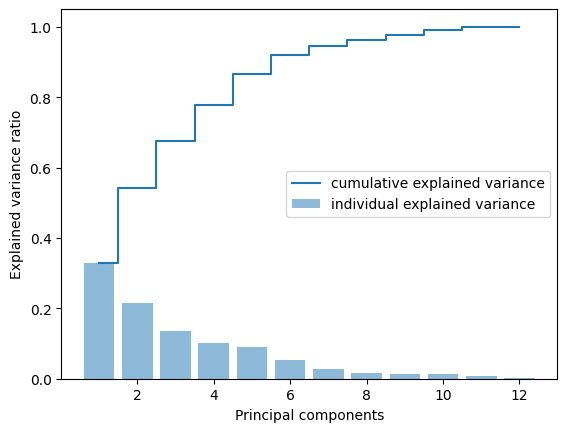

In [38]:
plt.bar(range(1,13), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,13),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [39]:
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_7D = np.dot(df,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D) 

In [40]:
Proj_data_df

,0,1,2,3,4,5,6
0,-0.311435,0.984065,-0.421507,-0.859631,0.316429,0.306337,-0.424992
1,0.042950,-0.211973,0.027255,-0.686195,0.542851,0.413241,-0.034218
2,0.924026,0.473445,-0.366457,-0.305065,0.513542,0.179179,-0.192374
3,0.973768,0.192743,0.008975,-0.528899,0.447289,0.149712,-0.054909
4,0.968539,0.207762,-0.561305,-1.096639,0.821798,0.121937,-0.148814
...,...,...,...,...,...,...,...
2235,0.939957,0.398591,-0.429724,-0.546561,0.542179,0.453658,-0.166610
2236,0.986877,0.169559,-0.087668,-1.097487,1.051516,0.731816,0.084598
2237,-0.032390,0.168047,-0.888836,-0.707022,0.391859,0.224904,0.056258
2238,0.930897,0.465487,-0.151574,-0.354360,0.855995,0.389021,-0.176573


In [41]:
Proj_data_df.describe()

,0,1,2,3,4,5,6
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.575591,0.308319,-0.268554,-0.707892,0.552521,0.269806,-0.083898
std,0.486559,0.393087,0.312230,0.269460,0.254174,0.194771,0.139626
min,-0.382757,-0.420406,-1.137772,-1.691917,-0.223002,-0.329248,-0.478014
25%,0.019974,0.054636,-0.474427,-0.896392,0.389646,0.136229,-0.168767
50%,0.916924,0.211369,-0.258491,-0.708500,0.521909,0.260207,-0.092203
75%,0.971304,0.468372,-0.056312,-0.515918,0.734179,0.396594,-0.031441
max,1.041172,1.657816,0.605183,0.002397,1.190203,1.040099,0.758356


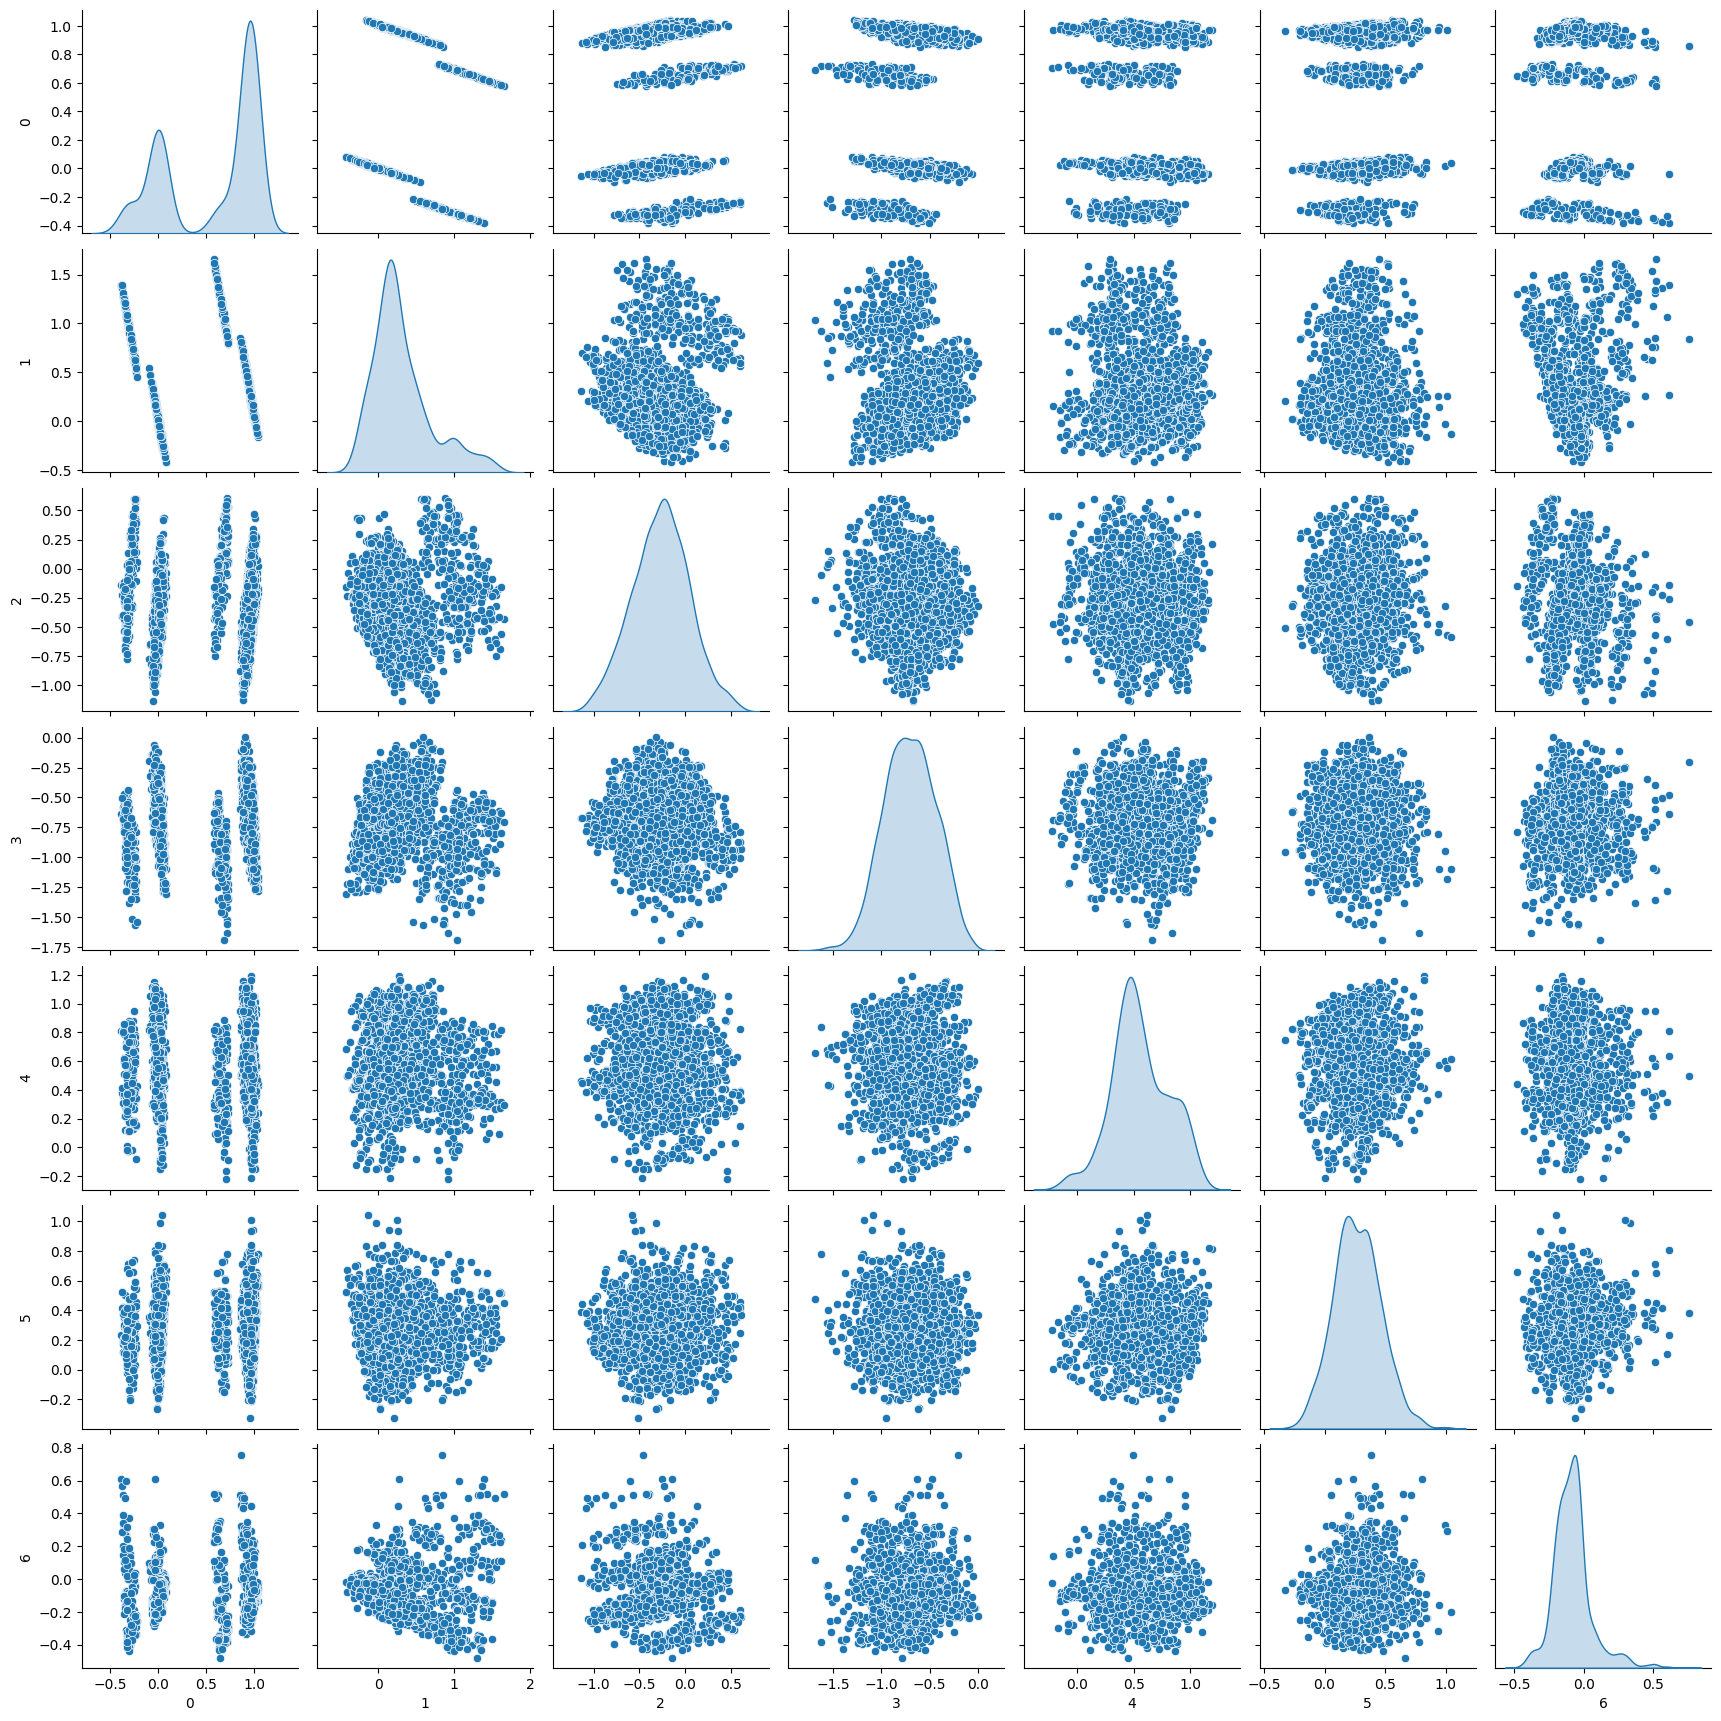

In [42]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

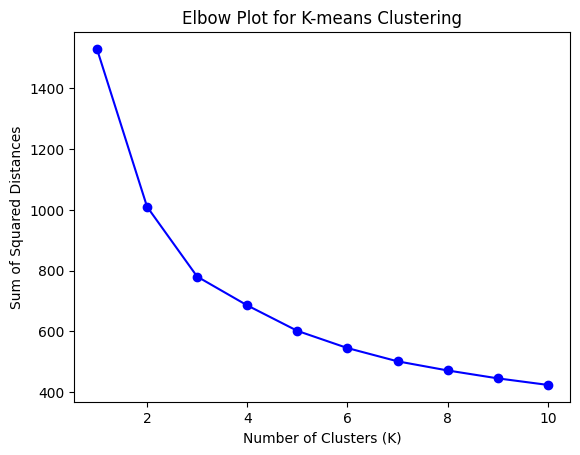

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Define the range of K values to test
k_values = range(1, 11)  # Test K from 1 to 10 (inclusive)

# Initialize an empty list to store the sum of squared distances (SSE) for each K
sse = []

# Calculate SSE for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Proj_data_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-means Clustering')
plt.show()



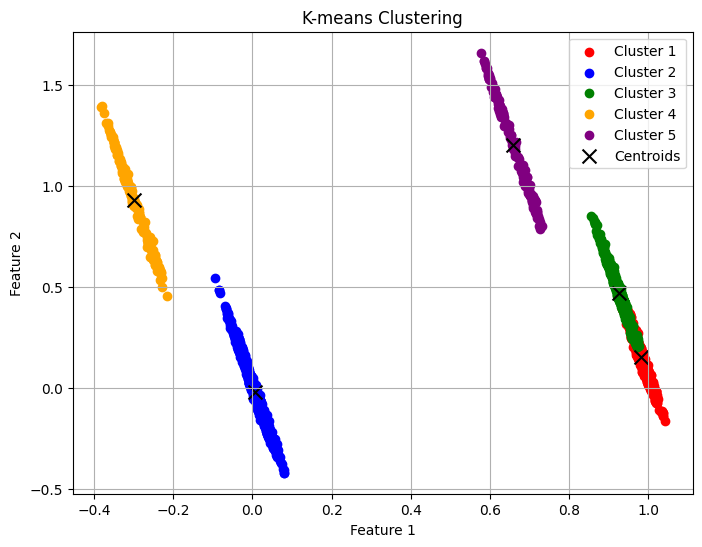

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your DataFrame is named Proj_data_df
columns = Proj_data_df.columns.tolist()

# Extract the data from the DataFrame columns
data = Proj_data_df[columns].values

K = 5  # Replace 3 with the desired number of clusters

kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(data)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Assign a unique color to each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink']

for i in range(K):
    # Extract data points belonging to the current cluster
    cluster_data = data[cluster_labels == i]
    
    # Plot the data points of the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label='Cluster {}'.format(i+1))

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Define the range of K values to test
k_values = range(2, 8)  # Test K from 2 to 10 (inclusive)

# Compute the silhouette score for each K
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Proj_data_df)
    labels = kmeans.labels_
    score = silhouette_score(Proj_data_df, labels)
    print(score)
    silhouette_scores.append(score)

# Print the silhouette scores for each K
for k, score in zip(k_values, silhouette_scores):
    print("K =", k, " Silhouette Score:", score)


0.36209598256162334
0.3860942598935761
0.2746931070304085
0.3019112931724098
0.288376873466226
0.2464790496921698
K = 2  Silhouette Score: 0.36209598256162334
K = 3  Silhouette Score: 0.3860942598935761
K = 4  Silhouette Score: 0.2746931070304085
K = 5  Silhouette Score: 0.3019112931724098
K = 6  Silhouette Score: 0.288376873466226
K = 7  Silhouette Score: 0.2464790496921698


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

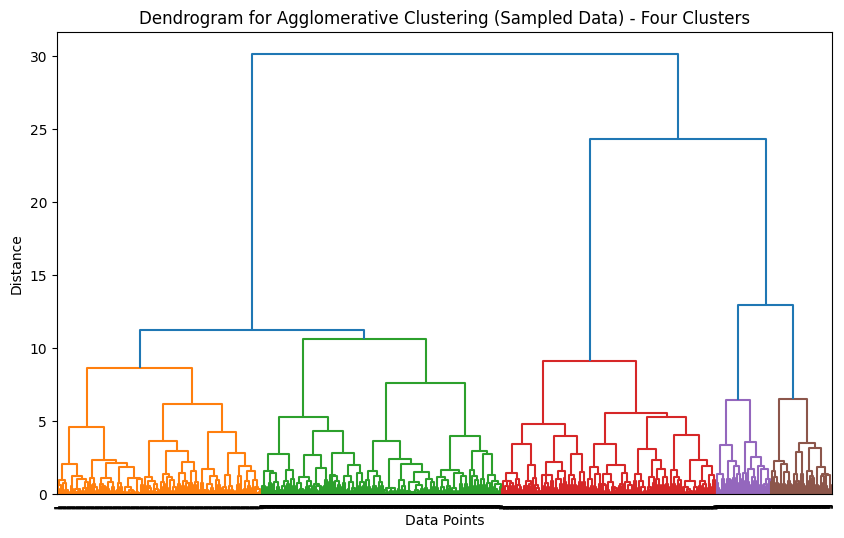

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Define the desired size of the sampled dataset
sample_size = 2240  # Adjust this value according to your needs

# Randomly sample a subset of the data
np.random.seed(0)  # Set a seed for reproducibility
sampled_data = Proj_data_df.sample(n=sample_size, replace=False)

# Compute the linkage matrix
linkage_matrix = linkage(sampled_data, method='ward')

# Extract four clusters
k = 5
labels = fcluster(linkage_matrix, k, criterion='maxclust')

# Plot the dendrogram with color-coded clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=linkage_matrix[-k+1, 2], labels=labels)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering (Sampled Data) - Four Clusters')
plt.show()



### Visualization and Interpretation of results

# In Pairplot shows a cloud like sturcture means it has no dependencies on other, if we see any line which near to the value of y=mx+c or a staight line. that means our applied PCA is not working properly in Proj_data_df

# for calculating silhouette_score from k (2-11), k =5 shows the best result 0.3019

# after applying PCA to any dataset, every column may loose its intigrity like when i try to retrive column name 

-----
## Happy Learning
-----